In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train=x_train.astype("float")/255
x_test=x_test.astype("float")/255

In [4]:
x_test.shape

(10000, 28, 28)

In [19]:
noise_factor=0.5
x_train_noise=x_train+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noise=x_test+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_clip=np.clip(x_train_noise, 0.0, 1.0)
x_test_clip=np.clip(x_test_noise, 0.0, 1.0)

In [12]:
input_sequence=layers.Input(shape=(28, 28))
info=layers.LSTM(128, activation="relu", return_state=True)(input_sequence)[1]
encoder_model=models.Model(input_sequence, info)

In [13]:
input_sequence_b=layers.Input(shape=(128, ))
repeat=layers.RepeatVector(28)(input_sequence_b)
info=layers.LSTM(128, activation="relu", return_sequences=True)(repeat)
layer_time=layers.TimeDistributed(layers.Dense(28, activation="sigmoid"))(info)
decoder_model=models.Model(input_sequence_b, layer_time)

In [14]:
model_input=models.Model(input_sequence, decoder_model(encoder_model(input_sequence)))

In [20]:
model_input.compile(optimizer="adam", loss="binary_crossentropy")
model_input.fit(x_train_clip, x_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 96ms/step - loss: 0.5547
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 74ms/step - loss: 0.5468
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 176s 94ms/step - loss: 0.5458
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 98ms/step - loss: 0.5504
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 62ms/step - loss: 0.5246
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - loss: 0.5232
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 0.5270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - loss: 0.5156
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - loss: 0.5111
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 0.5176


In [18]:
prediction=model_input.predict(x_test_clip)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


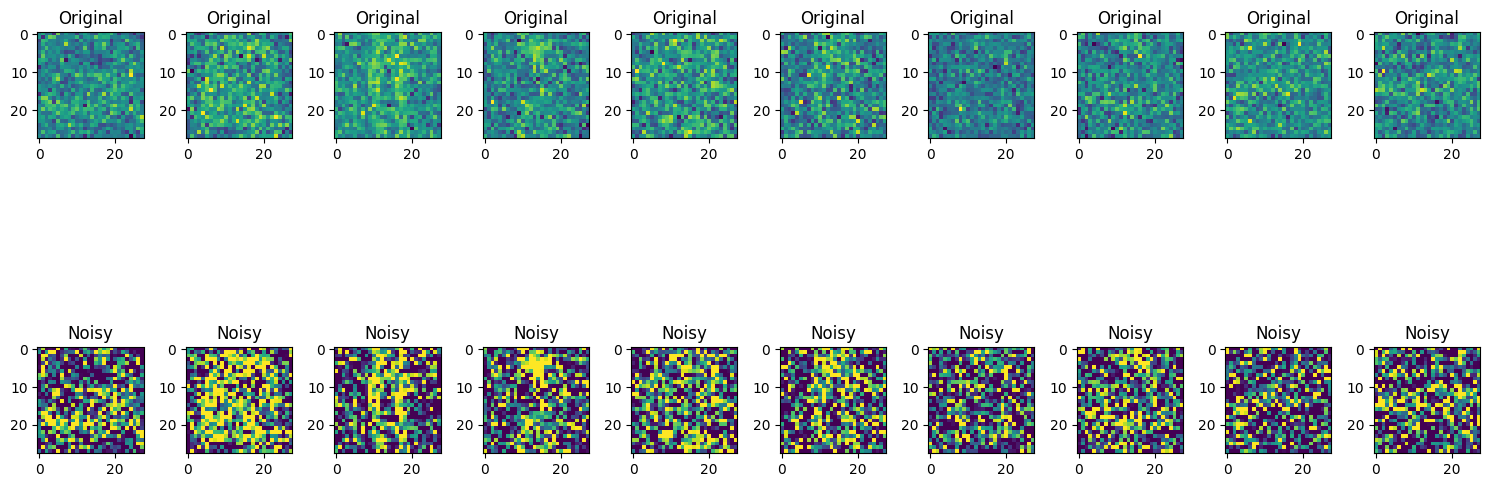

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i in range(10):
    ori=plt.subplot(3, 10, i+1)
    plt.imshow(x_test[i], cmap="grey")
    ori.set_title("Original")

    noi=plt.subplot(3, 10, i+11)
    plt.imshow(x_test_clip[i], cmap="grey")
    noi.title("Noisy")

    pre=plt.subplot(3, 10, i+21)
    plt.imshow(prediction[i], cmap="grey")
    pre.title("Reconstructed")
plt.tight_layout()
plt.show()